In [14]:
import pandas as pd
import yfinance as yf

In [15]:
ticker = "MSFT"

In [16]:
yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400
...,...,...,...,...,...,...
2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200
2021-05-03,253.399994,254.350006,251.119995,251.860001,251.860001,19626600


In [17]:
newtime = yf.download(ticker, start = "2014-01-01", end = "2018-12-31")

[*********************100%***********************]  1 of 1 completed


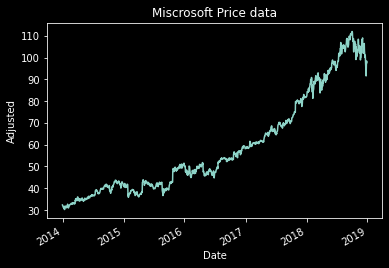

In [18]:
#https://alexandrenesovic.com/2019/11/17/how-to-find-import-and-plot-historical-financial-data-with-yfinance-python-and-how-to-calculate-the-daily-returns/
import matplotlib.pyplot as plt
newtime['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Miscrosoft Price data")
plt.style.use('dark_background')
plt.show()

In [19]:
newtime_daily = yf.download(ticker, start = "2014-01-01", end = "2018-12-31", period = "1d")
newtime_daily

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,37.400002,37.580002,37.220001,37.410000,32.272999,17503500
2014-01-02,37.349998,37.400002,37.099998,37.160000,32.057323,30632200
2014-01-03,37.200001,37.220001,36.599998,36.910000,31.841665,31134800
2014-01-06,36.849998,36.889999,36.110001,36.130001,31.168766,43603700
2014-01-07,36.330002,36.490002,36.209999,36.410000,31.410315,35802800
...,...,...,...,...,...,...
2018-12-21,101.629997,103.000000,97.459999,98.230003,95.563919,111242100
2018-12-24,97.680000,97.970001,93.980003,94.129997,91.575211,43935200
2018-12-26,95.139999,100.690002,93.959999,100.559998,97.830696,51634800


In [20]:
import numpy as np
msft_daily_returns = (newtime_daily['Adj Close'] / newtime_daily['Adj Close'].shift(1)) - 1
msft_daily_returns

Date
2013-12-31         NaN
2014-01-02   -0.006683
2014-01-03   -0.006727
2014-01-06   -0.021133
2014-01-07    0.007750
                ...   
2018-12-21   -0.032312
2018-12-24   -0.041739
2018-12-26    0.068310
2018-12-27    0.006166
2018-12-28   -0.007808
Name: Adj Close, Length: 1258, dtype: float64

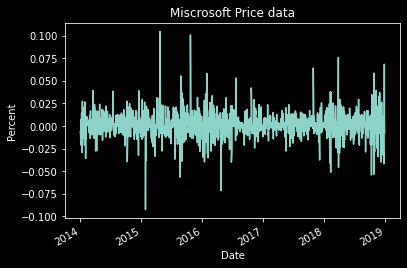

In [21]:
#Let's transform the series to a data frame in order to facilitate the plotting
msft_daily_returns = msft_daily_returns.to_frame()
msft_daily_returns.columns = ['Simple daily Return']

msft_daily_returns['Simple daily Return'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Miscrosoft Price data")
plt.show()

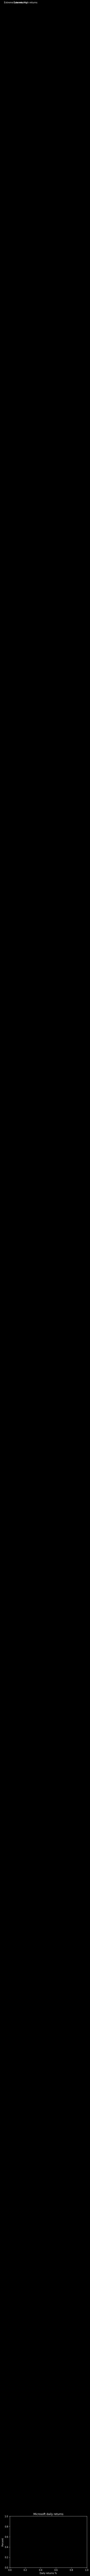

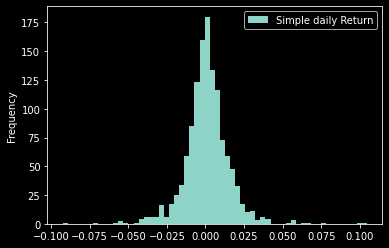

In [22]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
msft_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Microsoft daily returns")
ax1.text(-0.075,50,"Extreme Low returns")
ax1.text(0.05,50,"Extreme High returns")
plt.show()

In [23]:
avg_returns_daily = msft_daily_returns['Simple daily Return'].mean()
avg_returns_daily

Out[25]: 0.00098736878588533

In [24]:
avg_returns_4y = msft_daily_returns['Simple daily Return'].mean() * 250*4
avg_returns_4y 

Out[28]: 0.9873687858853301